## Original Data

In [1]:
import os
import sys
os.chdir('/home/soham/Desktop/GitHub/BTP/')
sys.path.append(os.getcwd())

from utils.preprocessing import slice_datasets, drop_columns, rename_columns
import pandas as pd


data = pd.read_excel('data/CFU per mL Analyte1_analyte2_analyte3_Sensor1_Sensor2_Sensor3.xlsx')

analyte_1, analyte_2, analyte_3 = slice_datasets(data)
[analyte_1, analyte_2, analyte_3] = drop_columns([analyte_1, analyte_2, analyte_3])
[analyte_1, analyte_2, analyte_3] = rename_columns([analyte_1, analyte_2, analyte_3])


# ---------- Manage 0 concentration data ------------------ #

for a in [analyte_1, analyte_2, analyte_3]:
    a['CFU/mL'] = a['CFU/mL'].replace(0, 1)

analyte_1.to_csv('data/Unsampled_Analyte1.csv', index=False)
analyte_2.to_csv('data/Unsampled_Analyte2.csv', index=False)
analyte_3.to_csv('data/Unsampled_Analyte3.csv', index=False)

## Resampling data

In [2]:
import pandas as pd
import numpy as np
import os

data1 = pd.read_csv('data/Unsampled_Analyte1.csv')
dummy_data1 = data1.copy()

for i in range(1, len(data1)):

    if (data1.iloc[i, 0] != data1.iloc[i-1, 0]):
        
        high = data1.iloc[i, :]
        low = data1.iloc[i-1, :]

        mean = (high + low) / 2
        std_dev = np.abs(high - low) / 2
        
        samples = np.random.normal(loc=mean, scale=std_dev/10, size=(10, len(data1.columns)))
        dummy_data1 = pd.concat([dummy_data1, pd.DataFrame(samples, columns=data1.columns)], ignore_index=True)

dummy_data1 = dummy_data1.sort_values(by='CFU/mL').reset_index(drop=True)



data2 = pd.read_csv('data/Unsampled_Analyte2.csv')
dummy_data2 = data2.copy()

for i in range(1, len(data2)):

    if (data2.iloc[i, 0] != data2.iloc[i-1, 0]):
        
        high = data2.iloc[i, :]
        low = data2.iloc[i-1, :]

        mean = (high + low) / 2
        std_dev = np.abs(high - low) / 2
        
        samples = np.random.normal(loc=mean, scale=std_dev/4, size=(10, len(data2.columns)))
        dummy_data2 = pd.concat([dummy_data2, pd.DataFrame(samples, columns=data2.columns)], ignore_index=True)

dummy_data2 = dummy_data2.sort_values(by='CFU/mL').reset_index(drop=True)



data3 = pd.read_csv('data/Unsampled_Analyte3.csv')
dummy_data3 = data3.copy()

for i in range(1, len(data3)):

    if (data3.iloc[i, 0] != data3.iloc[i-1, 0]):
        
        high = data3.iloc[i, :]
        low = data3.iloc[i-1, :]

        mean = (high + low) / 2
        std_dev = np.abs(high - low) / 2
        
        samples = np.random.normal(loc=mean, scale=std_dev/4, size=(10, len(data3.columns)))
        dummy_data3 = pd.concat([dummy_data3, pd.DataFrame(samples, columns=data3.columns)], ignore_index=True)

dummy_data3 = dummy_data3.sort_values(by='CFU/mL').reset_index(drop=True)


dummy_data1.to_csv('data/Sampled_Analyte1.csv', index=False)
dummy_data2.to_csv('data/Sampled_Analyte2.csv', index=False)
dummy_data3.to_csv('data/Sampled_Analyte3.csv', index=False)

## Exploratory Data Analysis

In [3]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/')

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from utils.preprocessing import log_transform
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

warnings.filterwarnings("ignore")

In [4]:
''' We have 10 points of Analyte1 data, Analyte2 data and Analyte3 data respectively. '''

# os.chdir('/media/soham/New Volume/GitHub/BTP')

analyte1 = pd.read_csv('data/Sampled_Analyte1.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)
analyte2 = pd.read_csv('data/Sampled_Analyte2.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)
analyte3 = pd.read_csv('data/Sampled_Analyte3.csv').sort_values('CFU/mL', ascending=True).reset_index(drop=True)

[analyte1, analyte2, analyte3]  = log_transform([analyte1, analyte2, analyte3])
analyte1

,CFU/mL,Sensor2,Sensor1,Sensor3,log_sensor1,log_sensor2,log_sensor3
0,1.000000e+00,-65.500000,-183.780000,-68.340000,5.213739,4.182050,4.224495
1,1.000000e+00,-50.570000,-150.230000,-64.370000,5.012167,3.923359,4.164648
2,4.795722e+00,-43.340175,-140.012607,-59.275706,4.941732,3.769080,4.082200
3,4.877674e+00,-43.658775,-139.315828,-59.132787,4.936744,3.776404,4.079786
4,5.027803e+00,-42.518911,-138.484788,-59.439236,4.930760,3.749949,4.084955
...,...,...,...,...,...,...,...
85,1.679162e+07,61.149204,-83.370368,44.064459,4.423293,4.113317,3.785654
86,1.763337e+07,61.597451,-81.659000,43.021199,4.402552,4.120620,3.761693
87,1.812703e+07,60.137109,-81.833644,43.676296,4.404688,4.096627,3.776806
88,1.929550e+07,60.888619,-83.288403,43.257585,4.422309,4.109046,3.767173


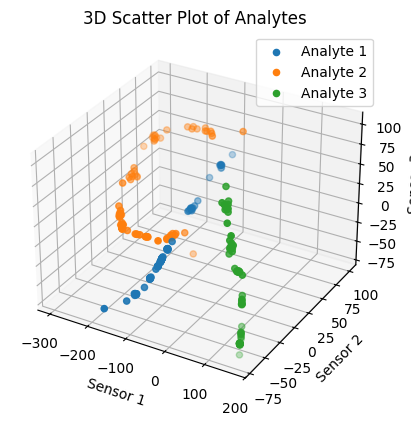

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(analyte1['Sensor1'], analyte1['Sensor2'], analyte1['Sensor3'], label='Analyte 1')

ax.scatter3D(analyte2['Sensor1'], analyte2['Sensor2'], analyte2['Sensor3'], label='Analyte 2')

ax.scatter3D(analyte3['Sensor1'], analyte3['Sensor2'], analyte3['Sensor3'], label='Analyte 3')

ax.set_xlabel('Sensor 1')
ax.set_ylabel('Sensor 2')
ax.set_zlabel('Sensor 3')
ax.set_title('3D Scatter Plot of Analytes')

ax.legend()
plt.show()

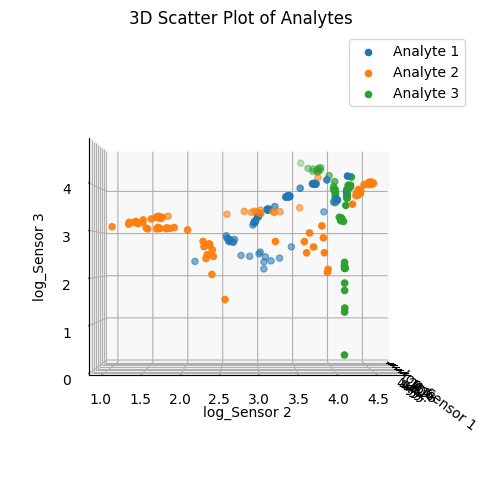

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(analyte1['log_sensor1'], analyte1['log_sensor2'], analyte1['log_sensor3'], label='Analyte 1')

ax.scatter3D(analyte2['log_sensor1'], analyte2['log_sensor2'], analyte2['log_sensor3'], label='Analyte 2')

ax.scatter3D(analyte3['log_sensor1'], analyte3['log_sensor2'], analyte3['log_sensor3'], label='Analyte 3')

ax.set_xlabel('log_Sensor 1')
ax.set_ylabel('log_Sensor 2')
ax.set_zlabel('log_Sensor 3')
ax.set_title('3D Scatter Plot of Analytes')

ax.legend()

ax.view_init(elev=0, azim=0)  
plt.show()

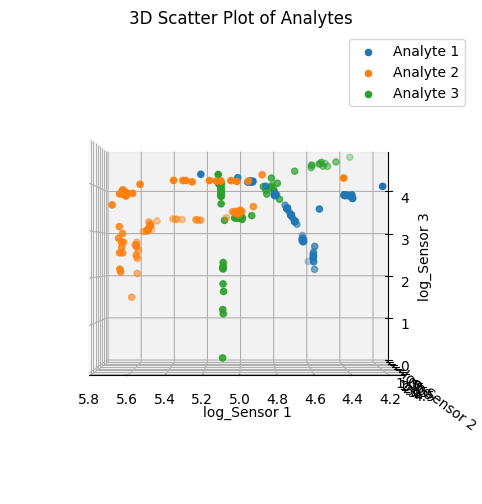

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(analyte1['log_sensor1'], analyte1['log_sensor2'], analyte1['log_sensor3'], label='Analyte 1')

ax.scatter3D(analyte2['log_sensor1'], analyte2['log_sensor2'], analyte2['log_sensor3'], label='Analyte 2')

ax.scatter3D(analyte3['log_sensor1'], analyte3['log_sensor2'], analyte3['log_sensor3'], label='Analyte 3')

ax.set_xlabel('log_Sensor 1')
ax.set_ylabel('log_Sensor 2')
ax.set_zlabel('log_Sensor 3')
ax.set_title('3D Scatter Plot of Analytes')

ax.legend()

ax.view_init(elev=0, azim=90)  
plt.show()

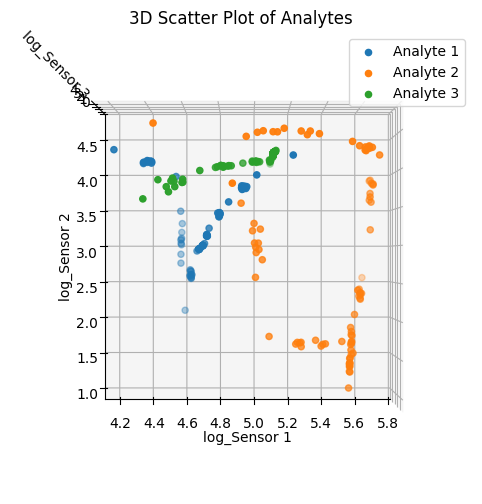

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(analyte1['log_sensor1'], analyte1['log_sensor2'], analyte1['log_sensor3'], label='Analyte 1')

ax.scatter3D(analyte2['log_sensor1'], analyte2['log_sensor2'], analyte2['log_sensor3'], label='Analyte 2')

ax.scatter3D(analyte3['log_sensor1'], analyte3['log_sensor2'], analyte3['log_sensor3'], label='Analyte 3')

ax.set_xlabel('log_Sensor 1')
ax.set_ylabel('log_Sensor 2')
ax.set_zlabel('log_Sensor 3')
ax.set_title('3D Scatter Plot of Analytes')

ax.legend()

ax.view_init(elev=90, azim=270)  
plt.show()

## Analyte 1

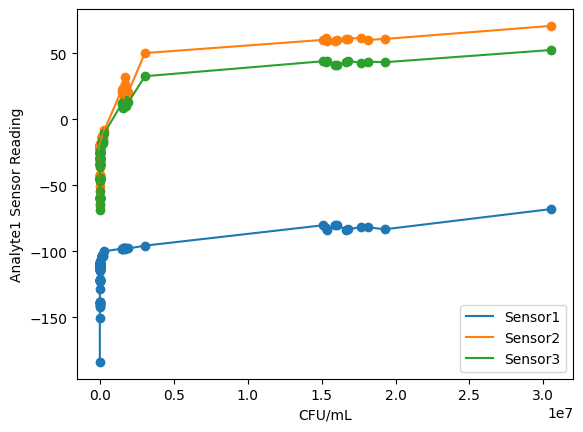

In [9]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte1['CFU/mL'], analyte1['Sensor1'])
plt.plot(analyte1['CFU/mL'], analyte1['Sensor1'], label='Sensor1')

plt.scatter(analyte1['CFU/mL'], analyte1['Sensor2'])
plt.plot(analyte1['CFU/mL'], analyte1['Sensor2'], label='Sensor2')

plt.scatter(analyte1['CFU/mL'], analyte1['Sensor3'])
plt.plot(analyte1['CFU/mL'], analyte1['Sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Analyte1 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/analyte1.png')
plt.show()

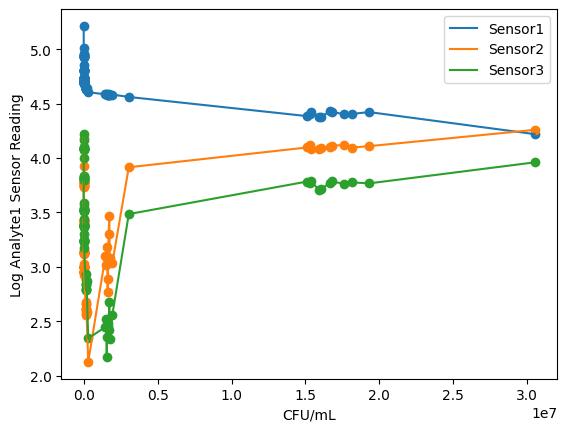

In [10]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte1['CFU/mL'], analyte1['log_sensor1'])
plt.plot(analyte1['CFU/mL'], analyte1['log_sensor1'], label='Sensor1')

plt.scatter(analyte1['CFU/mL'], analyte1['log_sensor2'])
plt.plot(analyte1['CFU/mL'], analyte1['log_sensor2'], label='Sensor2')

plt.scatter(analyte1['CFU/mL'], analyte1['log_sensor3'])
plt.plot(analyte1['CFU/mL'], analyte1['log_sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Log Analyte1 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/log_analyte1.png')
plt.show()

## Analyte 2

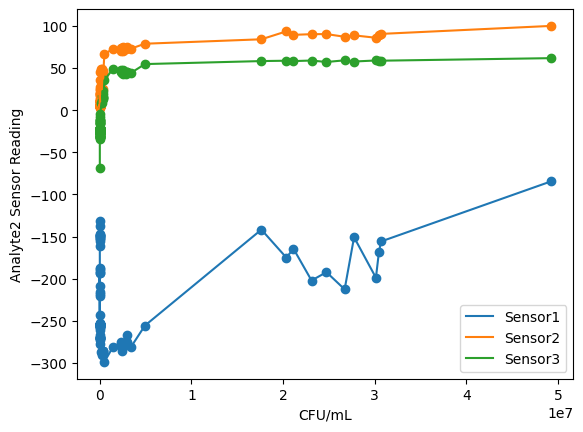

In [11]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte2['CFU/mL'], analyte2['Sensor1'])
plt.plot(analyte2['CFU/mL'], analyte2['Sensor1'], label='Sensor1')

plt.scatter(analyte2['CFU/mL'], analyte2['Sensor2'])
plt.plot(analyte2['CFU/mL'], analyte2['Sensor2'], label='Sensor2')

plt.scatter(analyte2['CFU/mL'], analyte2['Sensor3'])
plt.plot(analyte2['CFU/mL'], analyte2['Sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Analyte2 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/analyte2.png')
plt.show()

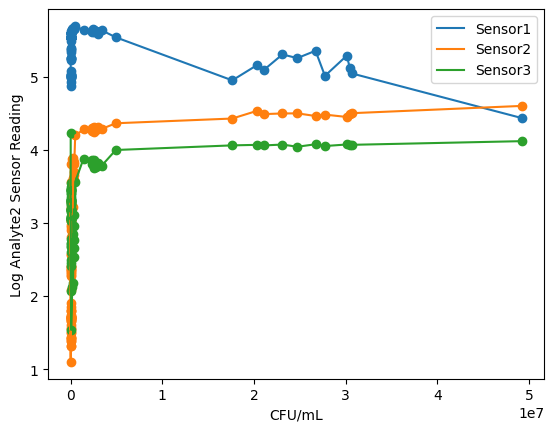

In [12]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte2['CFU/mL'], analyte2['log_sensor1'])
plt.plot(analyte2['CFU/mL'], analyte2['log_sensor1'], label='Sensor1')

plt.scatter(analyte2['CFU/mL'], analyte2['log_sensor2'])
plt.plot(analyte2['CFU/mL'], analyte2['log_sensor2'], label='Sensor2')

plt.scatter(analyte2['CFU/mL'], analyte2['log_sensor3'])
plt.plot(analyte2['CFU/mL'], analyte2['log_sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Log Analyte2 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/log_analyte2.png')
plt.show()

## Analyte 3

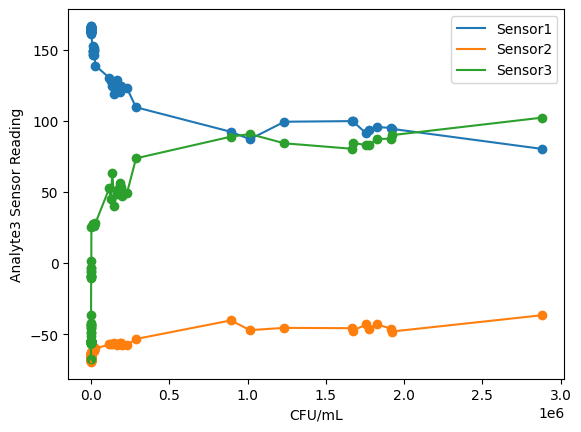

In [13]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte3['CFU/mL'], analyte3['Sensor1'])
plt.plot(analyte3['CFU/mL'], analyte3['Sensor1'], label='Sensor1')

plt.scatter(analyte3['CFU/mL'], analyte3['Sensor2'])
plt.plot(analyte3['CFU/mL'], analyte3['Sensor2'], label='Sensor2')

plt.scatter(analyte3['CFU/mL'], analyte3['Sensor3'])
plt.plot(analyte3['CFU/mL'], analyte3['Sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Analyte3 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/analyte3.png')
plt.show()

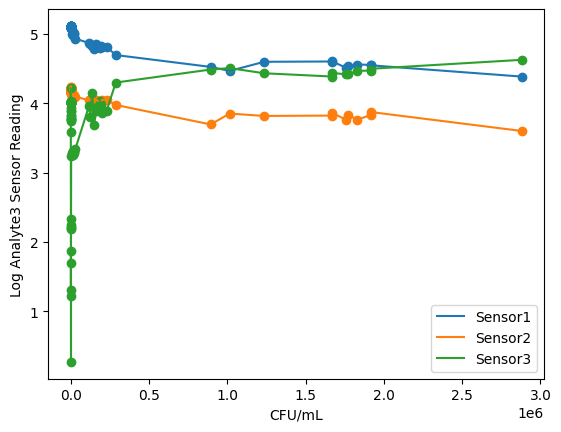

In [14]:
''' Trends of CFU/mL data with Sensor readings '''

plt.scatter(analyte3['CFU/mL'], analyte3['log_sensor1'])
plt.plot(analyte3['CFU/mL'], analyte3['log_sensor1'], label='Sensor1')

plt.scatter(analyte3['CFU/mL'], analyte3['log_sensor2'])
plt.plot(analyte3['CFU/mL'], analyte3['log_sensor2'], label='Sensor2')

plt.scatter(analyte3['CFU/mL'], analyte3['log_sensor3'])
plt.plot(analyte3['CFU/mL'], analyte3['log_sensor3'], label='Sensor3')

plt.xlabel('CFU/mL')
plt.ylabel('Log Analyte3 Sensor Reading')
plt.legend()
plt.savefig('docs/plots/log_analyte3.png')
plt.show()

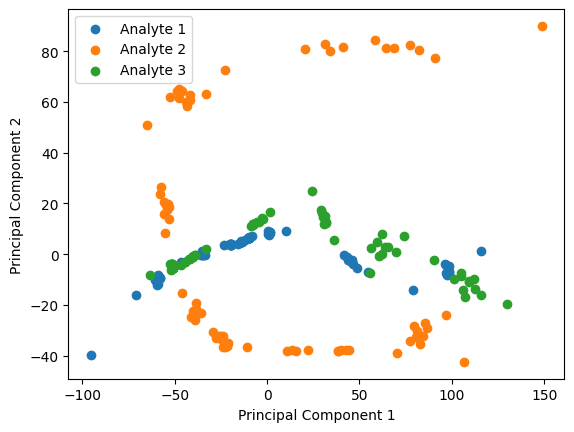

In [15]:
pca = PCA(n_components=3)
pca_analyte1 = pca.fit_transform(analyte1[['Sensor1', 'Sensor2', 'Sensor3']])

pca = PCA(n_components=3)
pca_analyte2 = pca.fit_transform(analyte2[['Sensor1', 'Sensor2', 'Sensor3']])

pca = PCA(n_components=3)
pca_analyte3 = pca.fit_transform(analyte3[['Sensor1', 'Sensor2', 'Sensor3']])

plt.scatter(pca_analyte1[:,0], pca_analyte1[:,1], label='Analyte 1')
plt.scatter(pca_analyte2[:,0], pca_analyte2[:,1], label='Analyte 2')
plt.scatter(pca_analyte3[:,0], pca_analyte3[:,1], label='Analyte 3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('docs/plots/pca.png')

plt.show()

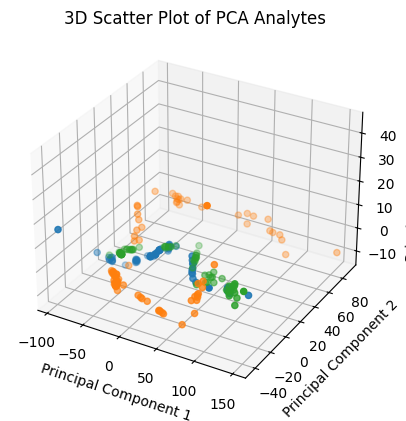

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(pca_analyte1[:, 0], pca_analyte1[:, 1], pca_analyte1[:, 2], label='Analyte 1')
ax.scatter3D(pca_analyte2[:, 0], pca_analyte2[:, 1], pca_analyte2[:, 2], label='Analyte 2')
ax.scatter3D(pca_analyte3[:, 0], pca_analyte3[:, 1], pca_analyte3[:, 2], label='Analyte 3')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA Analytes')

plt.show()

In [17]:
combined_data = pd.concat([analyte1, analyte2, analyte3], axis=0)
combined_data = combined_data.sample(frac=1).reset_index(drop=True)
combined_data.head(3)

,CFU/mL,Sensor2,Sensor1,Sensor3,log_sensor1,log_sensor2,log_sensor3
0,15904.712638,-19.177599,-108.644391,-25.390301,4.688080,2.953743,3.234367
1,165266.072248,-13.594909,-104.194928,-16.963987,4.646263,2.609695,2.831093
2,44.109403,-29.316681,-121.742694,-44.490410,4.801910,3.378157,3.795274


## PCA

In [18]:
pca = PCA(n_components=2)
pca_analyte1_analog = pca.fit_transform(analyte1[['Sensor1','Sensor2','Sensor3']]).T

pca = PCA(n_components=2)
pca_analyte1_log = pca.fit_transform(analyte1[['log_sensor1','log_sensor2','log_sensor3']]).T

pca = PCA(n_components=2)
pca_analyte2_analog = pca.fit_transform(analyte2[['Sensor1','Sensor2','Sensor3']]).T

pca = PCA(n_components=2)
pca_analyte2_log = pca.fit_transform(analyte2[['log_sensor1','log_sensor2','log_sensor3']]).T

pca = PCA(n_components=2)
pca_analyte3_analog = pca.fit_transform(analyte3[['Sensor1','Sensor2','Sensor3']]).T

pca = PCA(n_components=2)
pca_analyte3_log = pca.fit_transform(analyte3[['log_sensor1','log_sensor2','log_sensor3']]).T

In [19]:
pca_analyte1_analog_df = pd.DataFrame(pca_analyte1_analog.T, columns=['PC1','PC2'])
pca_analyte2_analog_df = pd.DataFrame(pca_analyte2_analog.T, columns=['PC1','PC2'])
pca_analyte3_analog_df = pd.DataFrame(pca_analyte3_analog.T, columns=['PC1','PC2'])

pca_analyte1_log_df = pd.DataFrame(pca_analyte1_log.T, columns=['PC1','PC2'])
pca_analyte2_log_df = pd.DataFrame(pca_analyte2_log.T, columns=['PC1','PC2'])
pca_analyte3_log_df = pd.DataFrame(pca_analyte3_log.T, columns=['PC1','PC2'])

In [23]:
pca_analog_df = pd.concat([pca_analyte1_analog_df, pca_analyte2_analog_df, pca_analyte3_analog_df], axis=0)
pca_analog_df = pca_analog_df.sample(frac=1).reset_index(drop=True)

## ICA

In [20]:
ica = ICA(n_components=2)
ica_analyte1_analog = ica.fit_transform(analyte1[['Sensor1','Sensor2','Sensor3']]).T

ica = ICA(n_components=2)
ica_analyte1_log = ica.fit_transform(analyte1[['log_sensor1','log_sensor2','log_sensor3']]).T

ica = ICA(n_components=2)
ica_analyte2_analog = ica.fit_transform(analyte2[['Sensor1','Sensor2','Sensor3']]).T

ica = ICA(n_components=2)
ica_analyte2_log = ica.fit_transform(analyte2[['log_sensor1','log_sensor2','log_sensor3']]).T

ica = ICA(n_components=2)
ica_analyte3_analog = ica.fit_transform(analyte3[['Sensor1','Sensor2','Sensor3']]).T

ica = ICA(n_components=2)
ica_analyte3_log = ica.fit_transform(analyte3[['log_sensor1','log_sensor2','log_sensor3']]).T

In [21]:
ica_analyte1_analog_df = pd.DataFrame(ica_analyte1_analog.T, columns=['IC1','IC2'])
ica_analyte2_analog_df = pd.DataFrame(ica_analyte2_analog.T, columns=['IC1','IC2'])
ica_analyte3_analog_df = pd.DataFrame(ica_analyte3_analog.T, columns=['IC1','IC2'])

ica_analyte1_log_df = pd.DataFrame(ica_analyte1_log.T, columns=['IC1','IC2'])
ica_analyte2_log_df = pd.DataFrame(ica_analyte2_log.T, columns=['IC1','IC2'])
ica_analyte3_log_df = pd.DataFrame(ica_analyte3_log.T, columns=['IC1','IC2'])

In [24]:
ica_analog_df = pd.concat([ica_analyte1_analog_df, ica_analyte2_analog_df, ica_analyte3_analog_df], axis=0)
ica_analog_df = ica_analog_df.sample(frac=1).reset_index(drop=True)

## Clustering of PCA on analog data

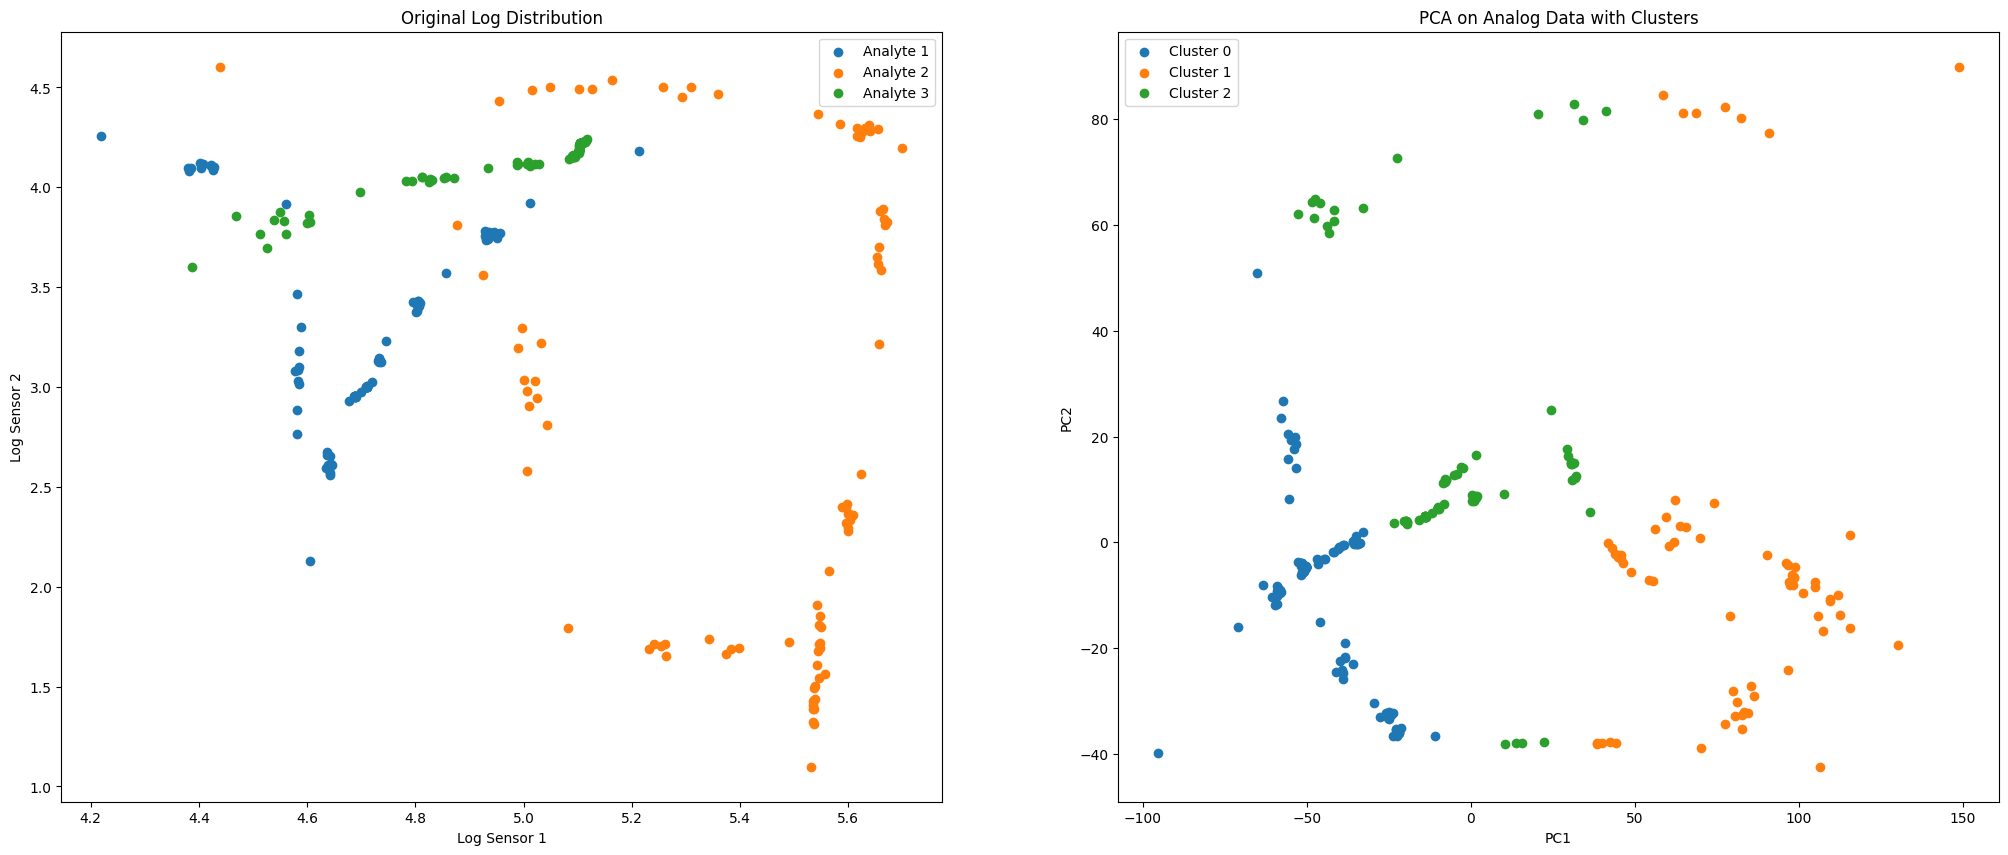

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_analog_df)
pca_analog_df['cluster'] = kmeans.labels_


fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].scatter(analyte1['log_sensor1'], analyte1['log_sensor2'], label='Analyte 1')
ax[0].scatter(analyte2['log_sensor1'], analyte2['log_sensor2'], label='Analyte 2')
ax[0].scatter(analyte3['log_sensor1'], analyte3['log_sensor2'], label='Analyte 3')

ax[0].set_xlabel('Log Sensor 1')
ax[0].set_ylabel('Log Sensor 2')
ax[0].legend()
ax[0].set_title('Original Log Distribution')

ax[1].scatter(pca_analog_df[pca_analog_df['cluster'] == 0]['PC1'], pca_analog_df[pca_analog_df['cluster'] == 0]['PC2'], label='Cluster 0')
ax[1].scatter(pca_analog_df[pca_analog_df['cluster'] == 1]['PC1'], pca_analog_df[pca_analog_df['cluster'] == 1]['PC2'], label='Cluster 1')
ax[1].scatter(pca_analog_df[pca_analog_df['cluster'] == 2]['PC1'], pca_analog_df[pca_analog_df['cluster'] == 2]['PC2'], label='Cluster 2')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('PCA on Analog Data with Clusters')
ax[1].legend()

plt.show()

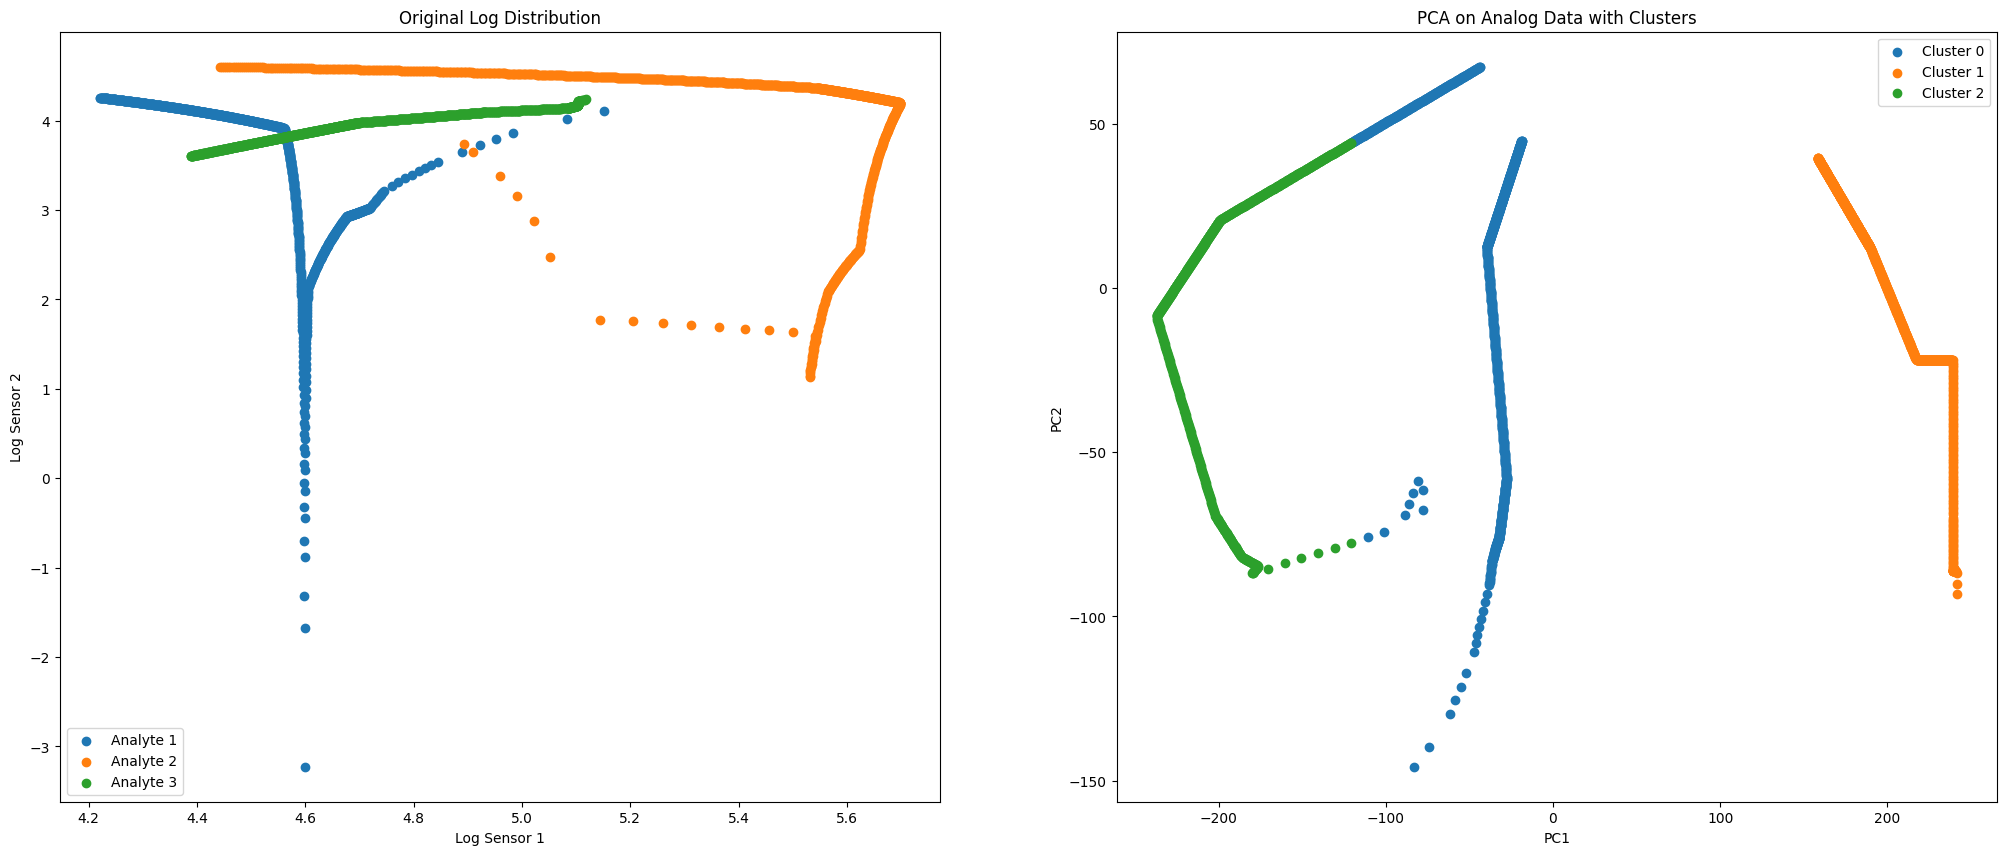

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].scatter(analyte1['log_sensor1'], analyte1['log_sensor2'], label='Analyte 1')
ax[0].scatter(analyte2['log_sensor1'], analyte2['log_sensor2'], label='Analyte 2')
ax[0].scatter(analyte3['log_sensor1'], analyte3['log_sensor2'], label='Analyte 3')

ax[0].set_xlabel('Log Sensor 1')
ax[0].set_ylabel('Log Sensor 2')
ax[0].legend()
ax[0].set_title('Original Log Distribution')

ax[1].scatter(pca_analog_df[pca_analog_df['cluster'] == 0]['PC1'], pca_analog_df[pca_analog_df['cluster'] == 0]['PC2'], label='Cluster 0')
ax[1].scatter(pca_analog_df[pca_analog_df['cluster'] == 1]['PC1'], pca_analog_df[pca_analog_df['cluster'] == 1]['PC2'], label='Cluster 1')
ax[1].scatter(pca_analog_df[pca_analog_df['cluster'] == 2]['PC1'], pca_analog_df[pca_analog_df['cluster'] == 2]['PC2'], label='Cluster 2')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('PCA on Analog Data with Clusters')
ax[1].legend()

plt.show()

In [ ]:
pca_raw_data

array([[-202.00710575,   18.40549126],
       [-221.43777215,    3.43778024],
       [ -37.59547862,    0.50372957],
       ...,
       [ 239.41251091,  -85.92940402],
       [ -20.31694599,   42.28995281],
       [ 239.27264531,  -75.62260904]])

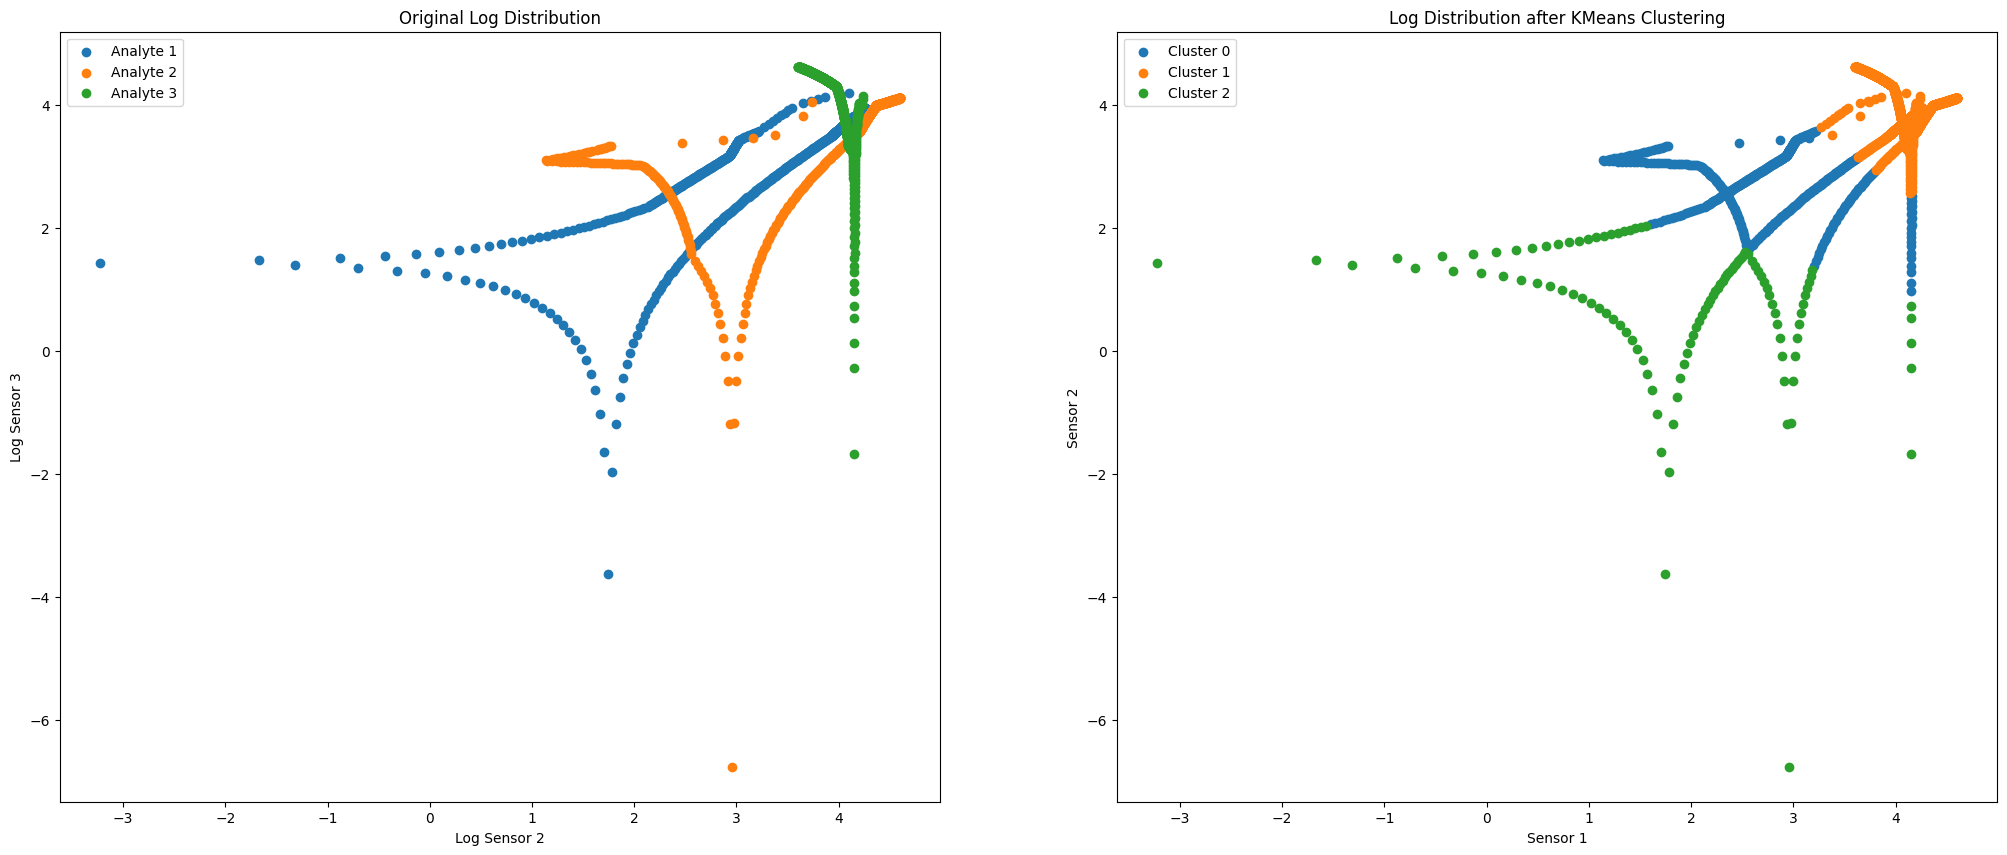

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].scatter(analyte1['log_sensor2'], analyte1['log_sensor3'], label='Analyte 1')
ax[0].scatter(analyte2['log_sensor2'], analyte2['log_sensor3'], label='Analyte 2')
ax[0].scatter(analyte3['log_sensor2'], analyte3['log_sensor3'], label='Analyte 3')

ax[0].set_xlabel('Log Sensor 2')
ax[0].set_ylabel('Log Sensor 3')
ax[0].legend()
ax[0].set_title('Original Log Distribution')

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(combined_data[['log_sensor2', 'log_sensor3']])
combined_data['cluster'] = kmeans.labels_

ax[1].scatter(combined_data[combined_data['cluster'] == 0]['log_sensor2'], combined_data[combined_data['cluster'] == 0]['log_sensor3'], label='Cluster 0')
ax[1].scatter(combined_data[combined_data['cluster'] == 1]['log_sensor2'], combined_data[combined_data['cluster'] == 1]['log_sensor3'], label='Cluster 1')
ax[1].scatter(combined_data[combined_data['cluster'] == 2]['log_sensor2'], combined_data[combined_data['cluster'] == 2]['log_sensor3'], label='Cluster 2')
ax[1].set_xlabel('Sensor 1')
ax[1].set_ylabel('Sensor 2')
ax[1].set_title('Log Distribution after KMeans Clustering')
ax[1].legend()

plt.show()

# DBSCAN Clustering

In [ ]:
labelled_log_data = combined_data[['log_sensor1', 'log_sensor2', 'log_sensor3', 'cluster']]
labelled_data = combined_data[['Sensor1', 'Sensor2', 'Sensor3', 'cluster']]

/tmp/ipykernel_4022/3479921569.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_data['cluster'] = dbscan_model.labels_


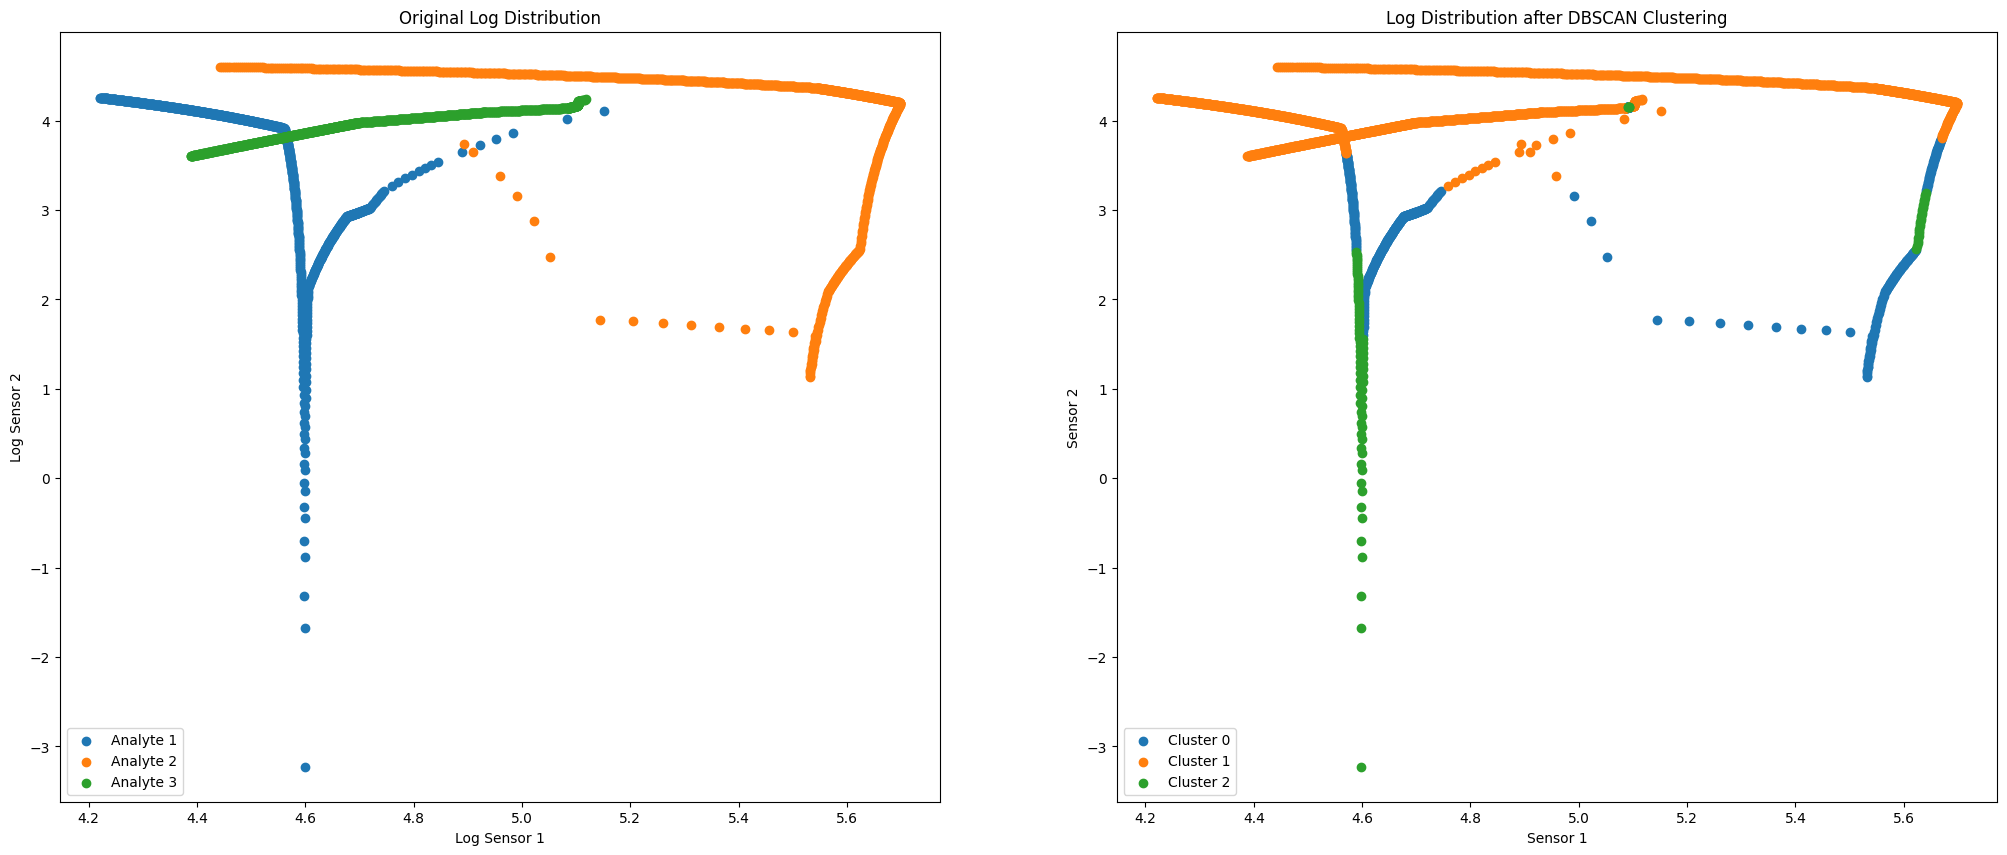

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].scatter(analyte1['log_sensor1'], analyte1['log_sensor2'], label='Analyte 1')
ax[0].scatter(analyte2['log_sensor1'], analyte2['log_sensor2'], label='Analyte 2')
ax[0].scatter(analyte3['log_sensor1'], analyte3['log_sensor2'], label='Analyte 3')

ax[0].set_xlabel('Log Sensor 1')
ax[0].set_ylabel('Log Sensor 2')
ax[0].legend()
ax[0].set_title('Original Log Distribution')

dbscan_model = DBSCAN(eps=0.25, min_samples=9)
dbscan_model.fit(labelled_data[['Sensor1', 'Sensor2', 'Sensor3']])
labelled_data['cluster'] = dbscan_model.labels_

ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 0]['log_sensor1'], labelled_log_data[labelled_log_data['cluster'] == 0]['log_sensor2'], label='Cluster 0')
ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 1]['log_sensor1'], labelled_log_data[labelled_log_data['cluster'] == 1]['log_sensor2'], label='Cluster 1')
ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 2]['log_sensor1'], labelled_log_data[labelled_log_data['cluster'] == 2]['log_sensor2'], label='Cluster 2')
ax[1].set_xlabel('Sensor 1')
ax[1].set_ylabel('Sensor 2')
ax[1].set_title('Log Distribution after DBSCAN Clustering')
ax[1].legend()    
plt.show()

/tmp/ipykernel_4022/4183497613.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_data['cluster'] = dbscan_model.labels_


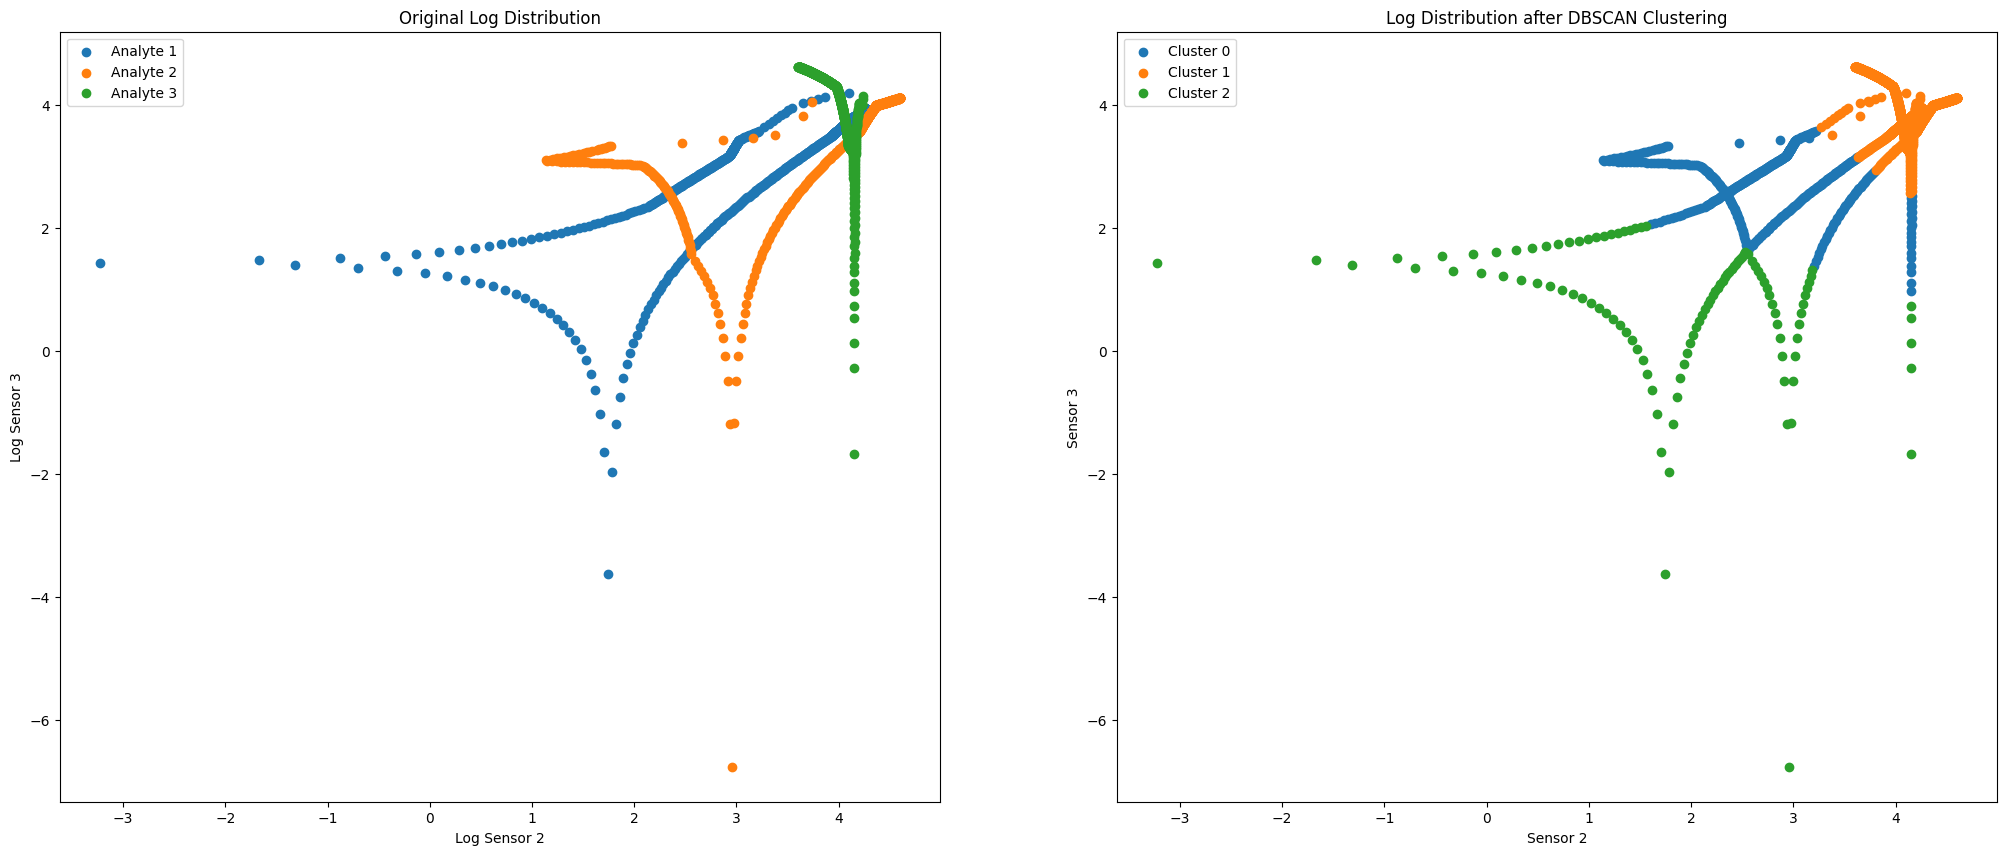

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].scatter(analyte1['log_sensor2'], analyte1['log_sensor3'], label='Analyte 1')
ax[0].scatter(analyte2['log_sensor2'], analyte2['log_sensor3'], label='Analyte 2')
ax[0].scatter(analyte3['log_sensor2'], analyte3['log_sensor3'], label='Analyte 3')

ax[0].set_xlabel('Log Sensor 2')
ax[0].set_ylabel('Log Sensor 3')
ax[0].legend()
ax[0].set_title('Original Log Distribution')

dbscan_model = DBSCAN(eps=0.25, min_samples=9)
dbscan_model.fit(labelled_data[['Sensor1', 'Sensor2', 'Sensor3']])
labelled_data['cluster'] = dbscan_model.labels_

ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 0]['log_sensor2'], labelled_log_data[labelled_log_data['cluster'] == 0]['log_sensor3'], label='Cluster 0')
ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 1]['log_sensor2'], labelled_log_data[labelled_log_data['cluster'] == 1]['log_sensor3'], label='Cluster 1')
ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 2]['log_sensor2'], labelled_log_data[labelled_log_data['cluster'] == 2]['log_sensor3'], label='Cluster 2')
ax[1].set_xlabel('Sensor 2')
ax[1].set_ylabel('Sensor 3')
ax[1].set_title('Log Distribution after DBSCAN Clustering')
ax[1].legend()    
plt.show()

# Gaussian Mixture

/tmp/ipykernel_4022/1839205824.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_data['cluster'] = gmm.predict(labelled_data[['Sensor1', 'Sensor2', 'Sensor3']])


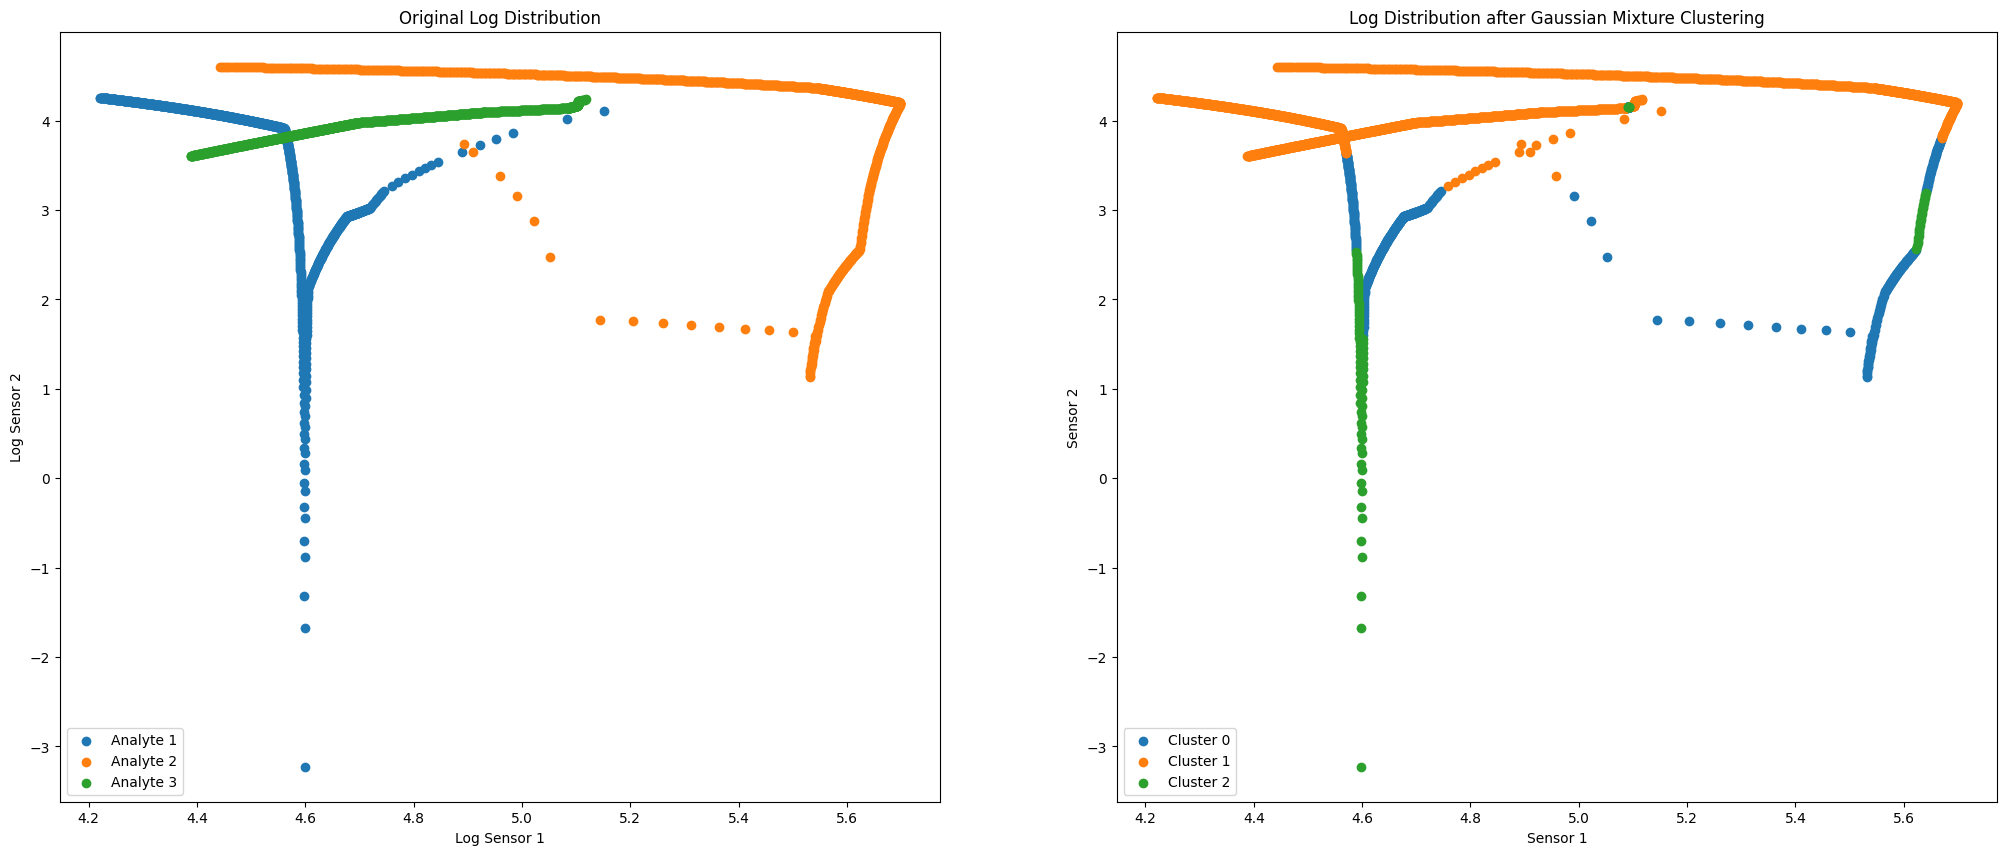

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].scatter(analyte1['log_sensor1'], analyte1['log_sensor2'], label='Analyte 1')
ax[0].scatter(analyte2['log_sensor1'], analyte2['log_sensor2'], label='Analyte 2')
ax[0].scatter(analyte3['log_sensor1'], analyte3['log_sensor2'], label='Analyte 3')

ax[0].set_xlabel('Log Sensor 1')
ax[0].set_ylabel('Log Sensor 2')
ax[0].legend()
ax[0].set_title('Original Log Distribution')

gmm = GaussianMixture(n_components=3)
gmm.fit(labelled_data[['Sensor1', 'Sensor2', 'Sensor3']])
labelled_data['cluster'] = gmm.predict(labelled_data[['Sensor1', 'Sensor2', 'Sensor3']])

ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 0]['log_sensor1'], labelled_log_data[labelled_log_data['cluster'] == 0]['log_sensor2'], label='Cluster 0')
ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 1]['log_sensor1'], labelled_log_data[labelled_log_data['cluster'] == 1]['log_sensor2'], label='Cluster 1')
ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 2]['log_sensor1'], labelled_log_data[labelled_log_data['cluster'] == 2]['log_sensor2'], label='Cluster 2')
ax[1].set_xlabel('Sensor 1')
ax[1].set_ylabel('Sensor 2')
ax[1].set_title('Log Distribution after Gaussian Mixture Clustering')
ax[1].legend()    
plt.show()

/tmp/ipykernel_4022/1712112201.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_data['cluster'] = gmm.predict(labelled_data[['Sensor1', 'Sensor2', 'Sensor3']])


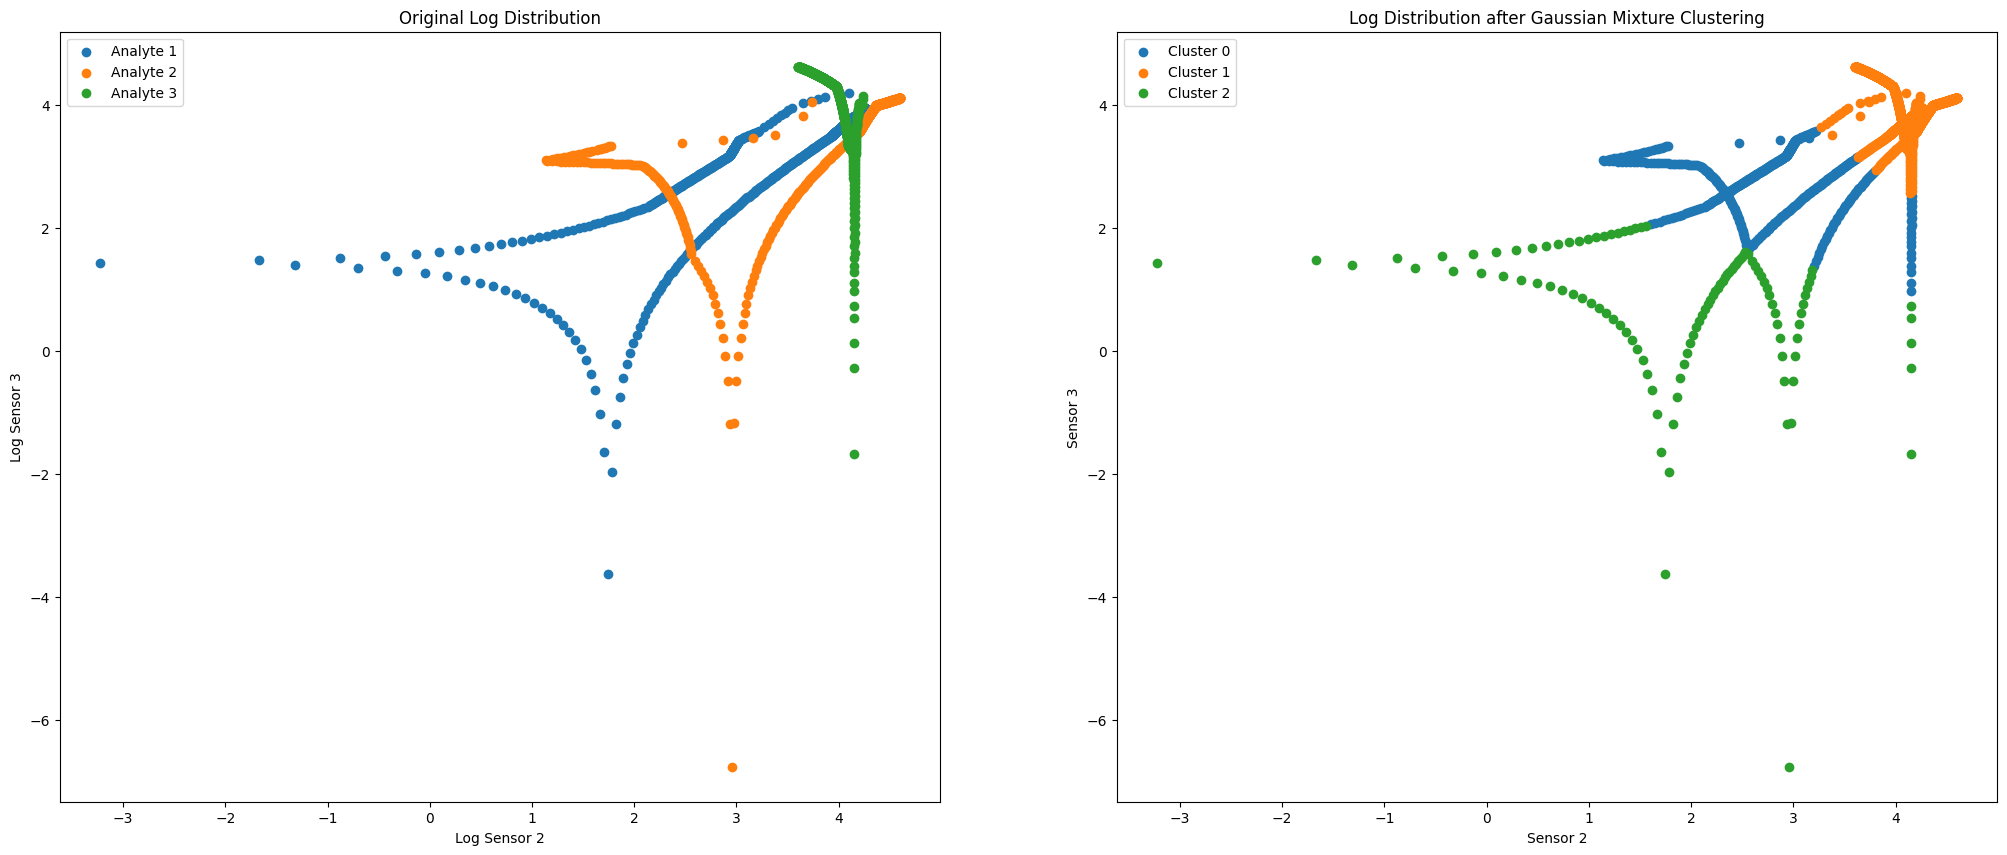

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].scatter(analyte1['log_sensor2'], analyte1['log_sensor3'], label='Analyte 1')
ax[0].scatter(analyte2['log_sensor2'], analyte2['log_sensor3'], label='Analyte 2')
ax[0].scatter(analyte3['log_sensor2'], analyte3['log_sensor3'], label='Analyte 3')

ax[0].set_xlabel('Log Sensor 2')
ax[0].set_ylabel('Log Sensor 3')
ax[0].legend()
ax[0].set_title('Original Log Distribution')

gmm = GaussianMixture(n_components=3)
gmm.fit(labelled_data[['Sensor1', 'Sensor2', 'Sensor3']])
labelled_data['cluster'] = gmm.predict(labelled_data[['Sensor1', 'Sensor2', 'Sensor3']])

ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 0]['log_sensor2'], labelled_log_data[labelled_log_data['cluster'] == 0]['log_sensor3'], label='Cluster 0')
ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 1]['log_sensor2'], labelled_log_data[labelled_log_data['cluster'] == 1]['log_sensor3'], label='Cluster 1')
ax[1].scatter(labelled_log_data[labelled_log_data['cluster'] == 2]['log_sensor2'], labelled_log_data[labelled_log_data['cluster'] == 2]['log_sensor3'], label='Cluster 2')
ax[1].set_xlabel('Sensor 2')
ax[1].set_ylabel('Sensor 3')
ax[1].set_title('Log Distribution after Gaussian Mixture Clustering')
ax[1].legend()    
plt.show()